# EDA

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/auto-mpg.csv",header=0)
df.head()# 기본적으로 6 rows까지 보여줌

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
df.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')

In [3]:
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight',
             'accerleration','model_year','origin','name']
# 또는
# df.rename(columns = {'car name' : 'name'}, inplace= True)


df.head()
# df.tail()

,mpg,cylinders,displacement,horsepower,weight,accerleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info() #데이터 프레임의 모든 기본 정보(타입, 행렬크기등)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    int64  
 4   weight         392 non-null    int64  
 5   accerleration  392 non-null    float64
 6   model_year     392 non-null    int64  
 7   origin         392 non-null    int64  
 8   name           392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
print(df.shape) # 행, 열,데이터 프레임의 차원 파악
print(df.dtypes) # 데이터 변수(열)들의 타입

(392, 9)
mpg              float64
cylinders          int64
displacement     float64
horsepower         int64
weight             int64
accerleration    float64
model_year         int64
origin             int64
name              object
dtype: object


In [6]:
# 특정 type 열만 고르기
df.select_dtypes(include=['integer']).head()

,cylinders,horsepower,weight,model_year,origin
0,8,130,3504,70,1
1,8,165,3693,70,1
2,8,150,3436,70,1
3,8,150,3433,70,1
4,8,140,3449,70,1


In [7]:
# 특정 type 열만 고르기
df.select_dtypes(include=['number']).head()

,mpg,cylinders,displacement,horsepower,weight,accerleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df.describe(include=[np.number], 
             percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
mpg,392.0,23.445918,7.805007,9.0,11.000,13.000,14.0,17.000,22.75,29.000,34.19,37.000,43.454,46.6
cylinders,392.0,5.471939,1.705783,3.0,3.910,4.000,4.0,4.000,4.00,8.000,8.00,8.000,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,70.910,85.000,90.0,105.000,151.00,275.750,350.00,400.000,441.260,455.0
horsepower,392.0,104.469388,38.491160,46.0,48.000,60.550,67.0,75.000,93.50,126.000,157.70,180.000,220.450,230.0
weight,392.0,2977.584184,849.402560,1613.0,1771.830,1931.600,1990.0,2225.250,2803.50,3614.750,4277.60,4464.000,4951.090,5140.0
accerleration,392.0,15.541327,2.758864,8.0,9.455,11.255,12.0,13.775,15.50,17.025,19.00,20.235,22.317,24.8
model_year,392.0,75.979592,3.683737,70.0,70.000,70.000,71.0,73.000,76.00,79.000,81.00,82.000,82.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.000,1.0,1.000,1.00,2.000,3.00,3.000,3.000,3.0


In [9]:
df.describe(include=[np.object, pd.Categorical]).T

C:\Users\admin\AppData\Local\Temp\ipykernel_10540\3687683688.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object, pd.Categorical]).T


,count,unique,top,freq
name,392,301,amc matador,5


In [10]:
df.describe().T #기초 통계량, 총 데이터 수(count), 
# 평균(mean), 표준편차(std), 분위수(25,50,75%), 최대최소(max,min)

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
accerleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [11]:
df.describe(include='all').T
#include='all'을 넣어주면 문자열 데이터가 있는 열에 대한 추가정보를 제공한다.
#정확히는 고유값 개수(unique), 최빈값(top), 빈도수(freq)이다.
#숫자형 열에 대해서는 NaN

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,392.0,NaN,NaN,NaN,23.445918,7.805007,9.0,17.0,22.75,29.0,46.6
cylinders,392.0,NaN,NaN,NaN,5.471939,1.705783,3.0,4.0,4.0,8.0,8.0
displacement,392.0,NaN,NaN,NaN,194.41199,104.644004,68.0,105.0,151.0,275.75,455.0
horsepower,392.0,NaN,NaN,NaN,104.469388,38.49116,46.0,75.0,93.5,126.0,230.0
weight,392.0,NaN,NaN,NaN,2977.584184,849.40256,1613.0,2225.25,2803.5,3614.75,5140.0
accerleration,392.0,NaN,NaN,NaN,15.541327,2.758864,8.0,13.775,15.5,17.025,24.8
model_year,392.0,NaN,NaN,NaN,75.979592,3.683737,70.0,73.0,76.0,79.0,82.0
origin,392.0,NaN,NaN,NaN,1.576531,0.805518,1.0,1.0,1.0,2.0,3.0
name,392,301,amc matador,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.nlargest(10, 'weight') #무게가 가장 나가는 10개만 추출

,mpg,cylinders,displacement,horsepower,weight,accerleration,model_year,origin,name
43,13.0,8,400.0,175,5140,12.0,71,1,pontiac safari (sw)
102,11.0,8,400.0,150,4997,14.0,73,1,chevrolet impala
41,12.0,8,383.0,180,4955,11.5,71,1,dodge monaco (sw)
89,12.0,8,429.0,198,4952,11.5,73,1,mercury marquis brougham
94,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
103,12.0,8,400.0,167,4906,12.5,73,1,ford country
42,13.0,8,400.0,170,4746,12.0,71,1,ford country squire (sw)
93,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
135,13.0,8,350.0,150,4699,14.5,74,1,buick century luxus (sw)


In [13]:
# 가장 가벼운 자동차 10위 중에, 엑셀이 가장 잘 나가는 차 5개
df.nsmallest(10, 'weight').nlargest(5, 'accerleration')

,mpg,cylinders,displacement,horsepower,weight,accerleration,model_year,origin,name
52,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
53,35.0,4,72.0,69,1613,18.0,71,3,datsun 1200
179,33.0,4,91.0,53,1795,17.5,75,3,honda civic cvcc
196,33.0,4,91.0,53,1795,17.4,76,3,honda civic
339,39.1,4,79.0,58,1755,16.9,81,3,toyota starlet


In [14]:
df.sort_values(['model_year', 'mpg'], ascending=False) 
#연식이 최근인 순인것들 중에 mpg 순으로 정렬

,mpg,cylinders,displacement,horsepower,weight,accerleration,model_year,origin,name
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
372,38.0,4,105.0,63,2125,14.7,82,1,plymouth horizon miser
377,38.0,4,91.0,67,1965,15.0,82,3,honda civic
379,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
381,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)
...,...,...,...,...,...,...,...,...,...
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20


In [15]:
print(type(df.count()))
df.count() #데이터의 열마다 개수를 시리즈 형태로 반환

<class 'pandas.core.series.Series'>


mpg              392
cylinders        392
displacement     392
horsepower       392
weight           392
accerleration    392
model_year       392
origin           392
name             392
dtype: int64

In [16]:
df['origin'].value_counts()  
#특정 열의 고유값 개수를 다시 시리즈형태로 반환

1    245
3     79
2     68
Name: origin, dtype: int64

In [17]:
# 기초통계량 직접 계산하기 : mean(),median(),max(), min(), std()
print(df.mean()) # 데이터프레임에 적용
print('\n')
print(df['mpg'].mean()) # 시리즈에 적용
print('\n')
print(df[['mpg','weight']].mean()) # 2개의 시리즈, 즉 데이터프레임에 적용

mpg                23.445918
cylinders           5.471939
displacement      194.411990
horsepower        104.469388
weight           2977.584184
accerleration      15.541327
model_year         75.979592
origin              1.576531
dtype: float64


23.445918367346938


mpg         23.445918
weight    2977.584184
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_10540\3890772331.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean()) # 데이터프레임에 적용


In [18]:
#상관계수(문자열은 제외) : corr()
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_10540\2664334908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,accerleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
accerleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [19]:
#두 변수만 지정해서 상관계수 구하기
print(df[['mpg','weight']].corr())

             mpg    weight
mpg     1.000000 -0.832244
weight -0.832244  1.000000


<AxesSubplot: xlabel='mpg'>

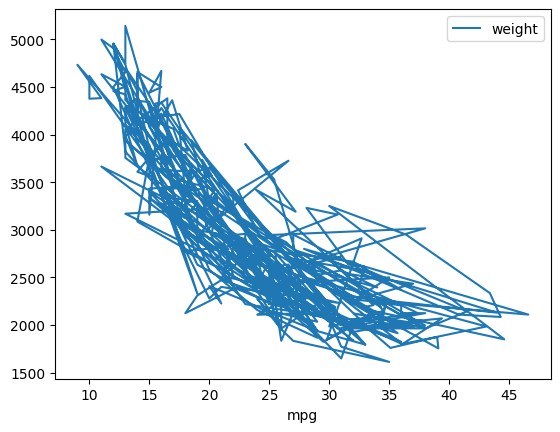

In [20]:
df.plot('mpg', 'weight')

<AxesSubplot: >

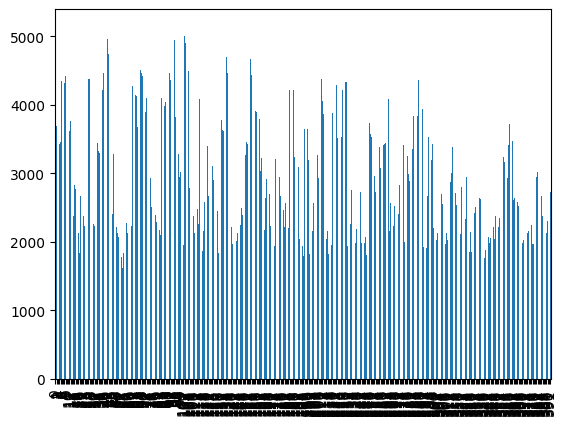

In [21]:
df.weight.plot(kind='bar')

<AxesSubplot: ylabel='Frequency'>

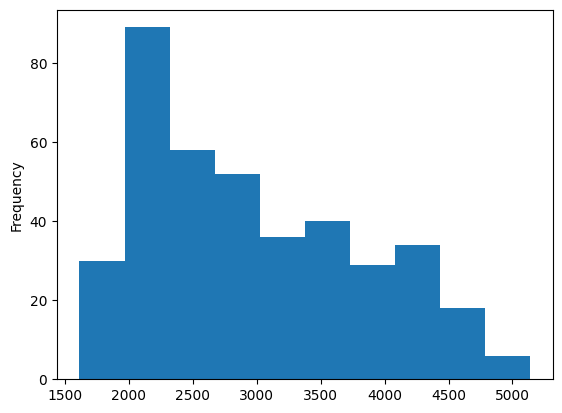

In [22]:
df.weight.plot(kind='hist')

<AxesSubplot: xlabel='weight', ylabel='mpg'>

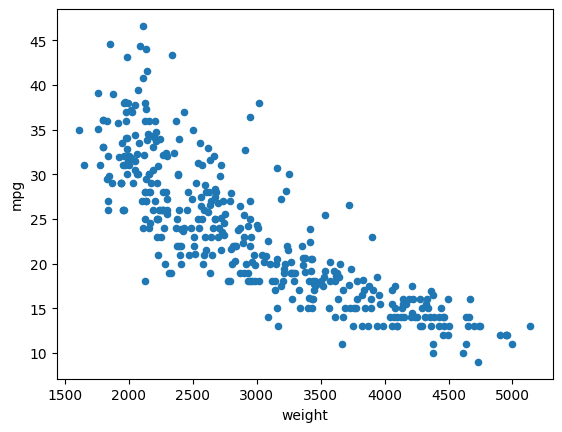

In [23]:
df.plot(x='weight',y='mpg', kind = 'scatter')

<AxesSubplot: >

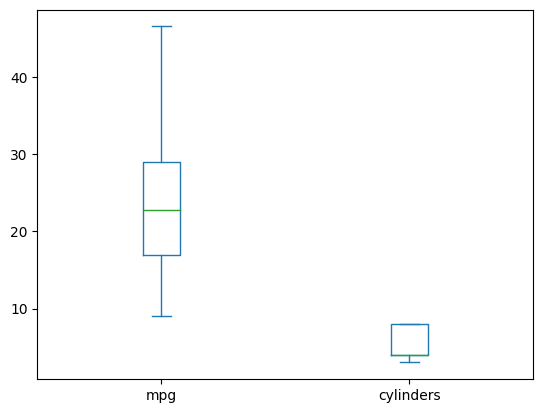

In [24]:
df[['mpg','cylinders']].plot(kind='box')

# Visual Analysis

In [25]:
# pip install pandas_visual_analysis

In [26]:
import pandas as pd
import seaborn as sns
from pandas_visual_analysis import VisualAnalysis
df = sns.load_dataset('mpg')
print(sns.get_dataset_names())

# https://nodejs.org/en/에 접속 소프트웨어 설치, 리부팅

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [27]:
VisualAnalysis(df)

In [28]:
#제공가능한 그래프 모양 확인
VisualAnalysis.widgets()

['Scatter',
 'ParallelCoordinates',
 'BrushSummary',
 'Histogram',
 'ParallelCategories',
 'BoxPlot']

In [29]:
# 구성 커스터마이징 1
VisualAnalysis(df,
    layout=[["Scatter", "Scatter"],
            ["BoxPlot", 'Histogram']],
               row_height=[200, 200]   # 인터페이스 전체 넓이 및 높이 지정
)

In [30]:
# 구성 커스터마이징 2
VisualAnalysis(df,
    layout=[["ParallelCoordinates"],
            ["ParallelCategories"]],
               row_height=[200, 300]
)

# Pandas의 Profiling 이용

In [ ]:
import pandas_profiling as pp

ppr = pp.ProfileReport(df)
ppr.to_widgets()
ppr.to_notebook_iframe()
ppr.to_file(output_file='auto-mpg_profiling.ppr.html')